# Otto Group Product Classification Challenge

[Classify products into the correct category](https://www.kaggle.com/c/otto-group-product-classification-challenge)

_Y. Sun_

This multi-classification problem is a great example of implementing XGBoost.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier, plot_importance

%matplotlib inline

# path of data files in my local ubuntu
path_data = '/home/ys/data/otto-group-product-classification-challenge/'

In [50]:
# training data
df_train = pd.read_csv(path_data + 'train.csv')
print(df_train.shape)
df_train.tail(3)

(61878, 95)


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9
61877,61878,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Class_9


In [100]:
# split data into X and y
X = df_train.drop(['id', 'target'], axis=1)
y = df_train['target']
# encode string class values as integers
y_label_encoded = LabelEncoder().fit_transform(y)
# seperate validation data
X_train, X_val, y_train, y_val = train_test_split(
    X, y_label_encoded, test_size=0.2, random_state=42) 
# build the model
model = XGBClassifier(n_estimators=200, objective='multi:softprob', nthread=-1)
# train the model
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train, y_train, early_stopping_rounds=10, 
          eval_metric=['mlogloss'], eval_set=eval_set, verbose=True)

[0]	validation_0-mlogloss:2.00066	validation_1-mlogloss:1.99947
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.85983	validation_1-mlogloss:1.85794


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=2, n_jobs=1,
              nthread=-1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

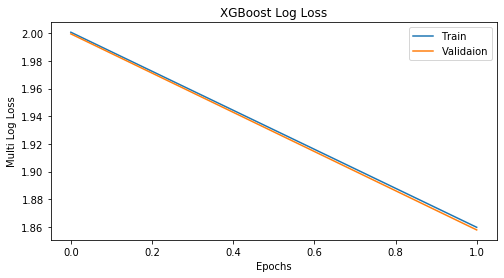

In [101]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validaion')
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Multi Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

Accuracy of validation data: 67.58 %
Confusion matrix of validation data:
 [[  86   59    8    4    2   18   11  139   72]
 [   1 2612  382   60   11   12    8   83    9]
 [   0 1060  389   35    0    3   26   39    9]
 [   0  348   39   81    4   45    8   12    1]
 [   0    8    4    0  537    0    0   16    0]
 [  14   88   26   10    1 2442   23  250   30]
 [  17  101   47   10    3   24  237  104    9]
 [  90  103   20   16   11   40   35 1320   39]
 [  24   99    7    2   12   43    4  174  660]]


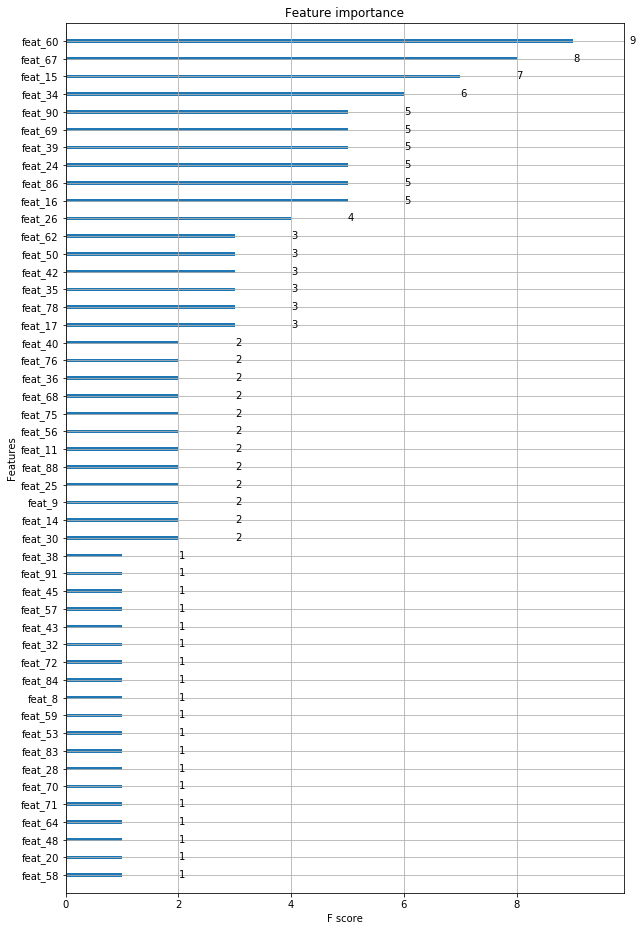

In [102]:
# model perfromance evaluation
y_val_pred = model.predict(X_val)
print('Accuracy of validation data: %.2f %%' % (accuracy_score(y_val, y_val_pred) * 100))
print('Confusion matrix of validation data:\n', confusion_matrix(y_val, y_val_pred))

# plot feature importance
fig, ax = plt.subplots(figsize=(10, 16))
plot_importance(model, ax=ax)
plt.show()

In [103]:
# test data
df_test = pd.read_csv(path_data + 'test.csv')
print(df_test.shape)
df_test.tail(3)

(144368, 94)


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
144365,144366,0,1,0,0,0,0,1,1,0,...,0,1,3,1,1,0,0,1,0,0
144366,144367,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,1,0
144367,144368,0,0,0,0,0,0,0,0,0,...,0,0,9,1,6,0,0,0,0,0


In [111]:
# submission format
df_sub = pd.read_csv(path_data + 'sampleSubmission.csv')
df_sub.tail(3)

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
144365,144366,1,0,0,0,0,0,0,0,0
144366,144367,1,0,0,0,0,0,0,0,0
144367,144368,1,0,0,0,0,0,0,0,0


In [ ]:
# prediction
y_test_pred = model.predict_proba(df_test.drop(['id'], axis=1))
# submission file 
df = pd.DataFrame(y_test_pred, index=df_sub.index, columns=df_sub.columns[1:])
df.insert(0, 'id', df_sub['id'].values)
df.to_csv('submission.csv', index=False)
df.tail(3)

In [116]:
# submit (3 times/day) and check result
#!kaggle competitions submit -c otto-group-product-classification-challenge -f submission.csv -m 'ys'
#!kaggle competitions submissions -c otto-group-product-classification-challenge

fileName        date                 description  status    publicScore  privateScore  
--------------  -------------------  -----------  --------  -----------  ------------  
submission.csv  2020-04-07 07:15:51  ys02         complete  0.65079      0.65045       
submission.csv  2020-04-07 06:38:00  ys01         complete  6.65191      6.57062       


It seems that when the number of features are large enough, there is no overfitting problem but instead the underefitting problem. Therefore, it is necessary to give a large number of iterations (n_estimators) for XGBClassifier.